# Detecting Brain Tumors in MRIs using a Convolutional Neural Network(VGG)

In [1]:
#importing libaries
import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16

#setting seed for reproducability
from numpy.random import seed
seed(25)
tf.random.set_seed(50)

In [2]:
# 0 - Normal
# 1 - Tumor

data = [] #creating a list for images
paths = [] #creating a list for paths
labels = [] #creating a list to put our 0 or 1 labels

#staring with the images that have tumors
for r, d, f in os.walk(r'brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

#working with the images with no tumors        
paths = []
for r, d, f in os.walk(r"brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)
        
data = np.array(data)
data.shape

labels = np.array(labels)
labels = labels.reshape(139,1)

print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

data shape is: (139, 128, 128, 3)
labels shape is: (139, 1)


In [3]:
#we have 139 images with 128 height, 128 weight, RGB color channel
print(data.shape)

(139, 128, 128, 3)


In [4]:
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

255
0


In [5]:
#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

1.0
0.0


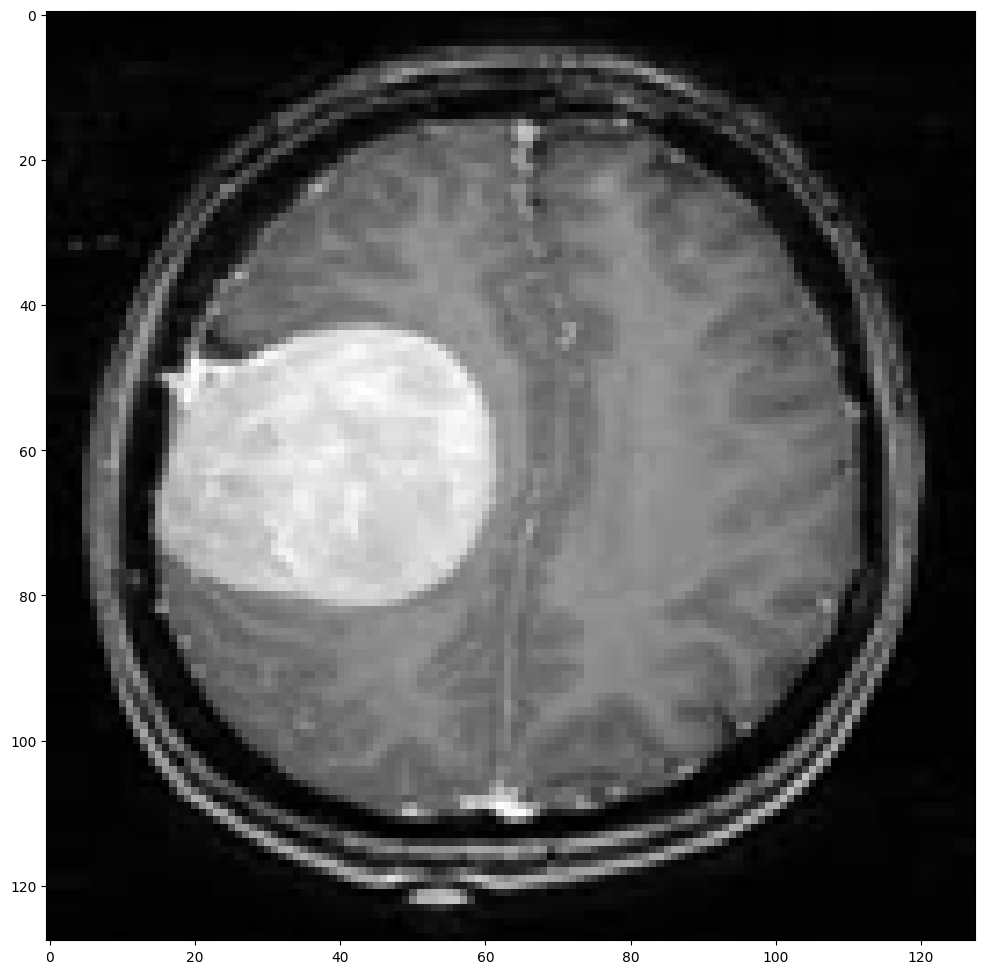

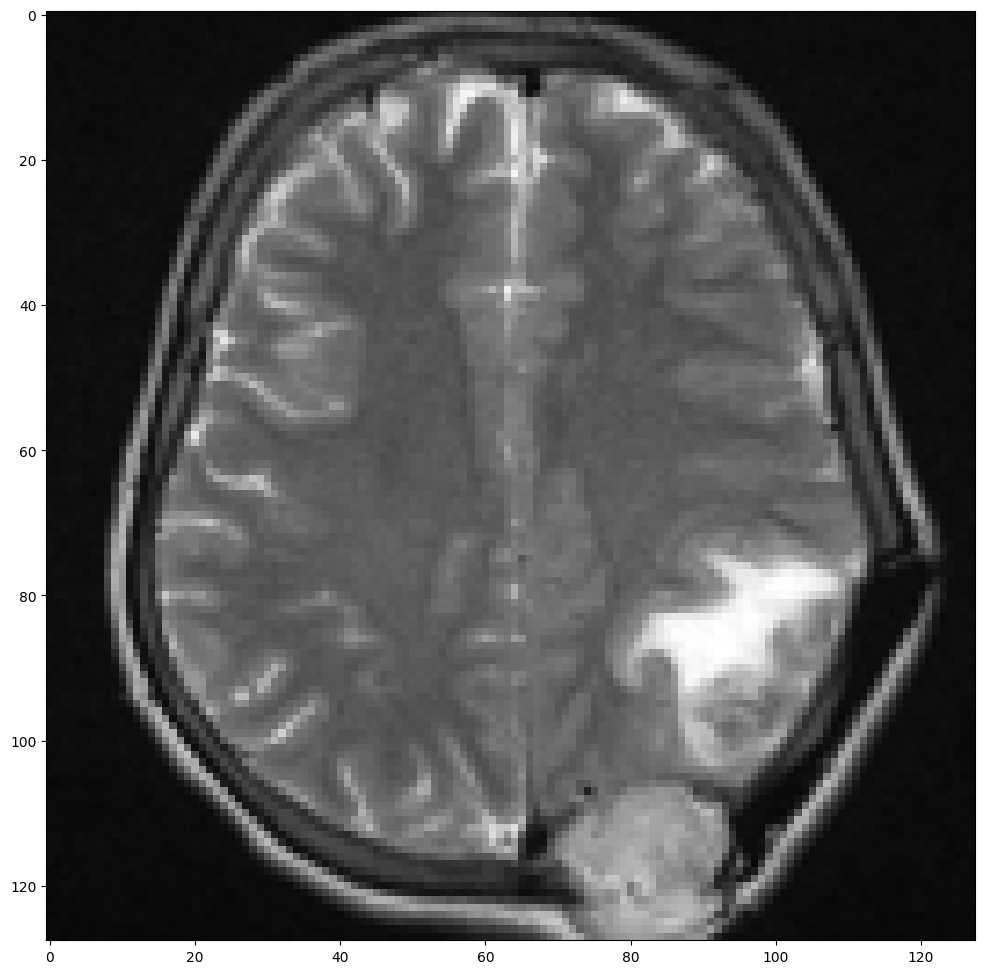

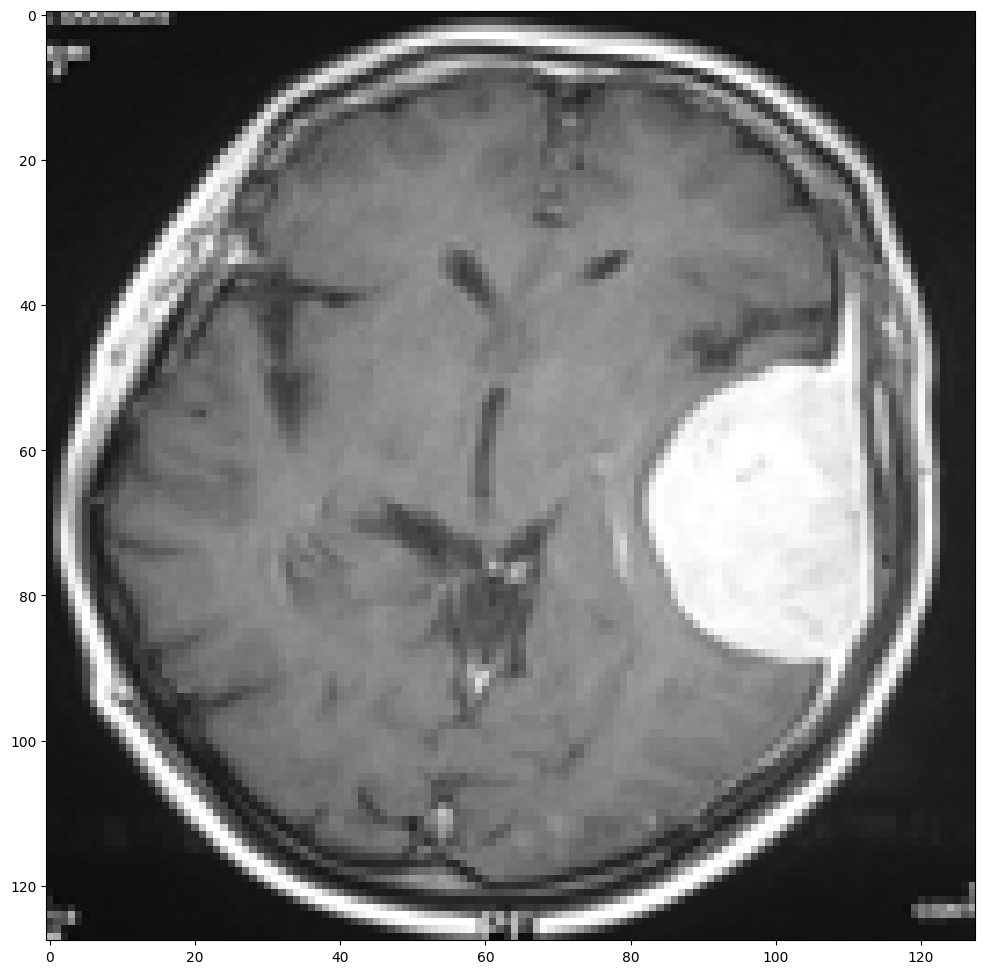

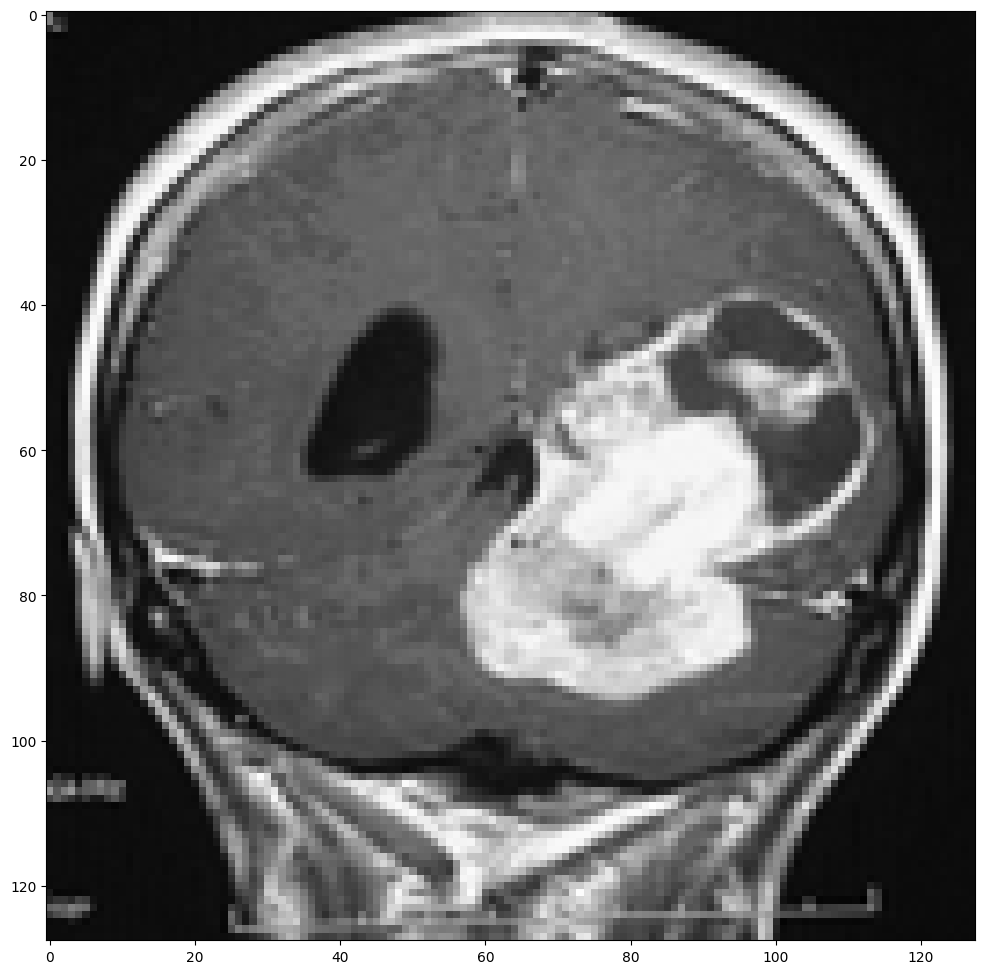

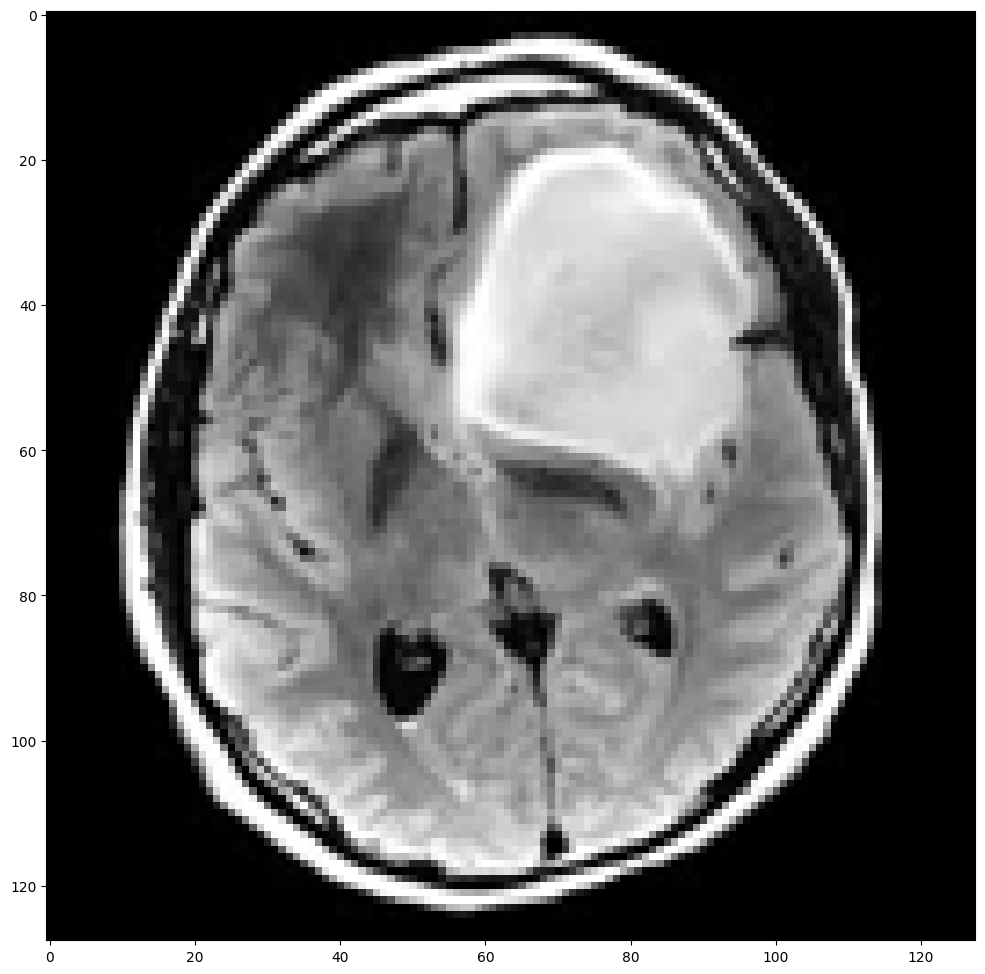

In [6]:
for i in range(5):
    fig = plt.figure(figsize=(70,70))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)

In [8]:
print("shape of our training data:",x_train.shape)
print("shape of our training labels:",y_train.shape)
print("shape of our test data:",x_test.shape)
print("shape of our test labels:",y_test.shape)

shape of our training data: (97, 128, 128, 3)
shape of our training labels: (97, 1)
shape of our test data: (42, 128, 128, 3)
shape of our test labels: (42, 1)


In [9]:
model = keras.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.summary()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,033 (8.93 MB)

 Trainable params: 2,340,033 (8.93 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to prevent overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

In [11]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=100,
    verbose=(2),
)

Epoch 1/100
2/2 - 2s - 1s/step - accuracy: 0.4948 - loss: 0.6922 - val_accuracy: 0.4762 - val_loss: 0.6913
Epoch 2/100
2/2 - 1s - 308ms/step - accuracy: 0.5361 - loss: 0.6898 - val_accuracy: 0.4524 - val_loss: 0.6917
Epoch 3/100
2/2 - 1s - 306ms/step - accuracy: 0.5361 - loss: 0.6886 - val_accuracy: 0.4286 - val_loss: 0.6923
Epoch 4/100
2/2 - 1s - 308ms/step - accuracy: 0.5670 - loss: 0.6873 - val_accuracy: 0.4286 - val_loss: 0.6931
Epoch 5/100
2/2 - 1s - 302ms/step - accuracy: 0.5464 - loss: 0.6881 - val_accuracy: 0.4286 - val_loss: 0.6941
Epoch 6/100
2/2 - 1s - 336ms/step - accuracy: 0.5670 - loss: 0.6801 - val_accuracy: 0.4286 - val_loss: 0.6952
Epoch 7/100
2/2 - 1s - 353ms/step - accuracy: 0.5567 - loss: 0.6756 - val_accuracy: 0.4286 - val_loss: 0.6965
Epoch 8/100
2/2 - 1s - 379ms/step - accuracy: 0.5464 - loss: 0.6759 - val_accuracy: 0.4286 - val_loss: 0.6979
Epoch 9/100
2/2 - 1s - 404ms/step - accuracy: 0.5464 - loss: 0.6714 - val_accuracy: 0.4286 - val_loss: 0.6994
Epoch 10/100


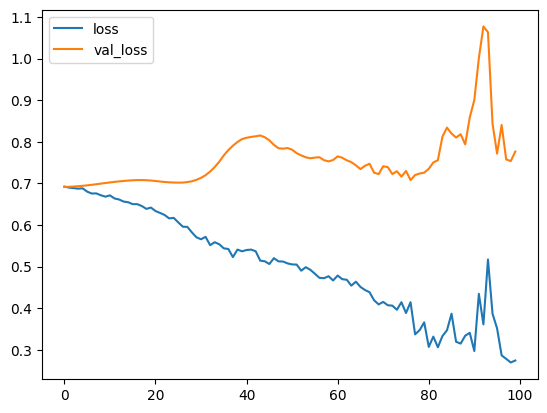

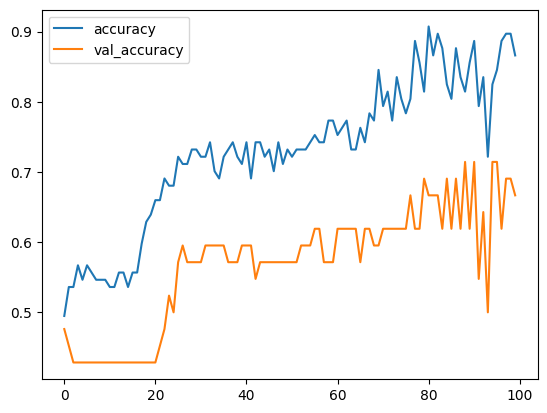

In [12]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [13]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
     
pred = pred.astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [14]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.75      0.62      0.68        24\n           1       0.59      0.72      0.65        18\n\n    accuracy                           0.67        42\n   macro avg       0.67      0.67      0.67        42\nweighted avg       0.68      0.67      0.67        42\n'

In [17]:
model = keras.Sequential([
    
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

In [19]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=120,
    # callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/120
2/2 - 2s - 922ms/step - accuracy: 0.4330 - loss: 0.6975 - val_accuracy: 0.4048 - val_loss: 0.6956
Epoch 2/120
2/2 - 1s - 301ms/step - accuracy: 0.3711 - loss: 0.6970 - val_accuracy: 0.4048 - val_loss: 0.6960
Epoch 3/120
2/2 - 1s - 294ms/step - accuracy: 0.4742 - loss: 0.6940 - val_accuracy: 0.4286 - val_loss: 0.6964
Epoch 4/120
2/2 - 1s - 302ms/step - accuracy: 0.4948 - loss: 0.6929 - val_accuracy: 0.4286 - val_loss: 0.6970
Epoch 5/120
2/2 - 1s - 296ms/step - accuracy: 0.5361 - loss: 0.6874 - val_accuracy: 0.4286 - val_loss: 0.6977
Epoch 6/120
2/2 - 1s - 298ms/step - accuracy: 0.5258 - loss: 0.6849 - val_accuracy: 0.4286 - val_loss: 0.6986
Epoch 7/120
2/2 - 1s - 293ms/step - accuracy: 0.5464 - loss: 0.6829 - val_accuracy: 0.4286 - val_loss: 0.6996
Epoch 8/120
2/2 - 1s - 302ms/step - accuracy: 0.5361 - loss: 0.6796 - val_accuracy: 0.4286 - val_loss: 0.7008
Epoch 9/120
2/2 - 1s - 322ms/step - accuracy: 0.5361 - loss: 0.6782 - val_accuracy: 0.4286 - val_loss: 0.7020
Epoch 10/1

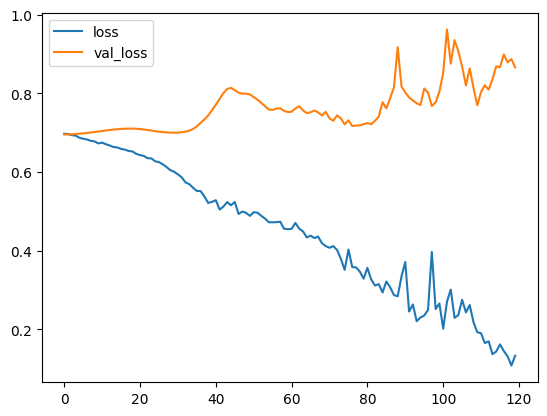

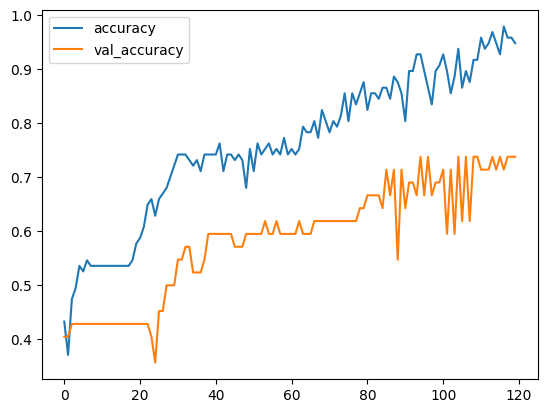

In [20]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [21]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [22]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.79      0.78        24\n           1       0.71      0.67      0.69        18\n\n    accuracy                           0.74        42\n   macro avg       0.73      0.73      0.73        42\nweighted avg       0.74      0.74      0.74        42\n'

In [23]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model with ImageNet weights
base_model = VGG16(
    weights='imagenet',  # Use weights trained on ImageNet
    include_top=False,   # Exclude the top fully connected layers
    input_shape=(128, 128, 3)  # Input shape for your task
)


In [24]:
model = keras.Sequential([
    
    # preprocessing.RandomFlip('horizontal'), # flip left-to-right
    
    base_model, #vgg16
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])


In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# #including early stopping to revent overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=40,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

In [33]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=12,
    verbose=(2),
)

Epoch 1/12
2/2 - 16s - 8s/step - accuracy: 0.4845 - loss: 0.7149 - val_accuracy: 0.5000 - val_loss: 0.6836
Epoch 2/12
2/2 - 14s - 7s/step - accuracy: 0.6907 - loss: 0.6086 - val_accuracy: 0.6905 - val_loss: 0.6135
Epoch 3/12
2/2 - 13s - 6s/step - accuracy: 0.7216 - loss: 0.5430 - val_accuracy: 0.5952 - val_loss: 0.6529
Epoch 4/12
2/2 - 15s - 8s/step - accuracy: 0.8144 - loss: 0.4714 - val_accuracy: 0.7857 - val_loss: 0.5335
Epoch 5/12
2/2 - 13s - 6s/step - accuracy: 0.8454 - loss: 0.3829 - val_accuracy: 0.7381 - val_loss: 0.5405
Epoch 6/12
2/2 - 12s - 6s/step - accuracy: 0.8660 - loss: 0.3064 - val_accuracy: 0.7381 - val_loss: 0.4847
Epoch 7/12
2/2 - 12s - 6s/step - accuracy: 0.9485 - loss: 0.2156 - val_accuracy: 0.8333 - val_loss: 0.4068
Epoch 8/12
2/2 - 12s - 6s/step - accuracy: 0.9691 - loss: 0.1935 - val_accuracy: 0.8095 - val_loss: 0.3518
Epoch 9/12
2/2 - 12s - 6s/step - accuracy: 0.9381 - loss: 0.1633 - val_accuracy: 0.7857 - val_loss: 0.4322
Epoch 10/12
2/2 - 12s - 6s/step - acc

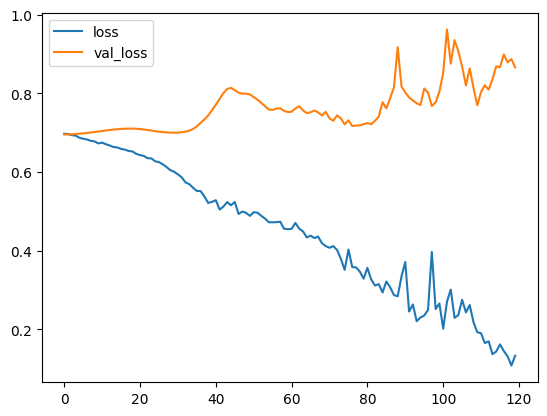

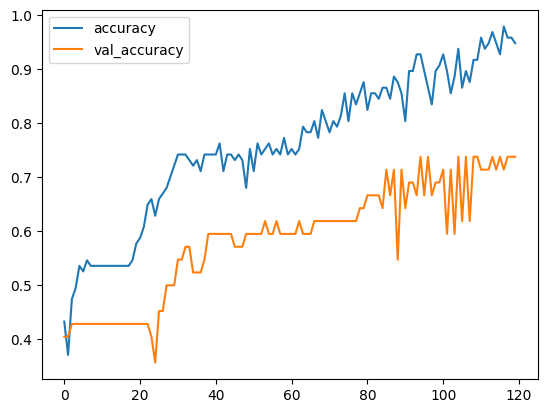

In [27]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [28]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001928C0B2520> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step


In [29]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.65      1.00      0.79        24\n           1       1.00      0.28      0.43        18\n\n    accuracy                           0.69        42\n   macro avg       0.82      0.64      0.61        42\nweighted avg       0.80      0.69      0.64        42\n'



Model                      |     Accuracy
---------------------------|---------------
Baseline                   |     86%
Adding Data Agumentation   |     89%
Adding Pretrained Model    |     98%